<a href="https://colab.research.google.com/github/Annie-jain/Student-Dropout-Success-and-Retention-prediction/blob/main/Student_Dropout%20Prediction%20model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.preprocessing import OrdinalEncoder


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Loading Dataset and Define target attribute

In [ ]:

df = pd.read_csv('/content/sample_data/dataset (1).csv')

y_xg=df.Target

#Keeping all the columns besides the target one
data = df.copy()
data.drop(['Target'],axis=1,inplace=True)


In [ ]:

len(df)

4424

In [ ]:
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [ ]:
df.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,6.886980,1.727848,9.899186,0.890823,2.531420,1.254521,12.322107,16.455244,7.317812,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,5.298964,1.313793,4.331792,0.311897,3.963707,1.748447,9.026251,11.044800,3.997828,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,2.000000,3.000000,5.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,8.000000,1.000000,10.000000,1.000000,1.000000,1.000000,13.000000,14.000000,6.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,12.000000,2.000000,13.000000,1.000000,1.000000,1.000000,22.000000,27.000000,10.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,18.000000,9.000000,17.000000,1.000000,17.000000,21.000000,29.000000,34.000000,32.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

In [ ]:
df.dtypes

Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance                          int64
Previous qualification                              int64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int64
Gender                                              int64
Scholarship holder                                  int64
Age at enrollm

In [ ]:
df.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular u

In [ ]:
student=df.loc[:,'Target'].value_counts()
print(student)

Graduate    2209
Dropout     1421
Enrolled     794
Name: Target, dtype: int64


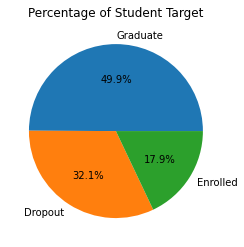

In [ ]:
plt.pie(student, labels=student.index, autopct='%1.1f%%')
plt.title('Percentage of Student Target')
plt.show()

Approx. students got graduated accoridng to this dataset is 50%

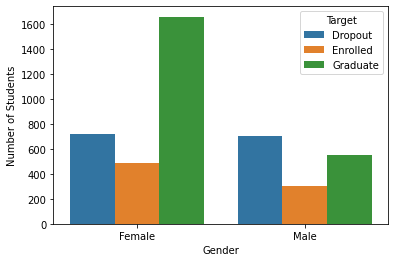

In [ ]:
sns.countplot(data=df, x='Gender', hue='Target', hue_order=['Dropout', 'Enrolled', 'Graduate'])

plt.xticks(ticks=[0,1], labels=['Female','Male'])
plt.ylabel('Number of Students')
plt.show()

Highest Number of graduates are FEMALE students

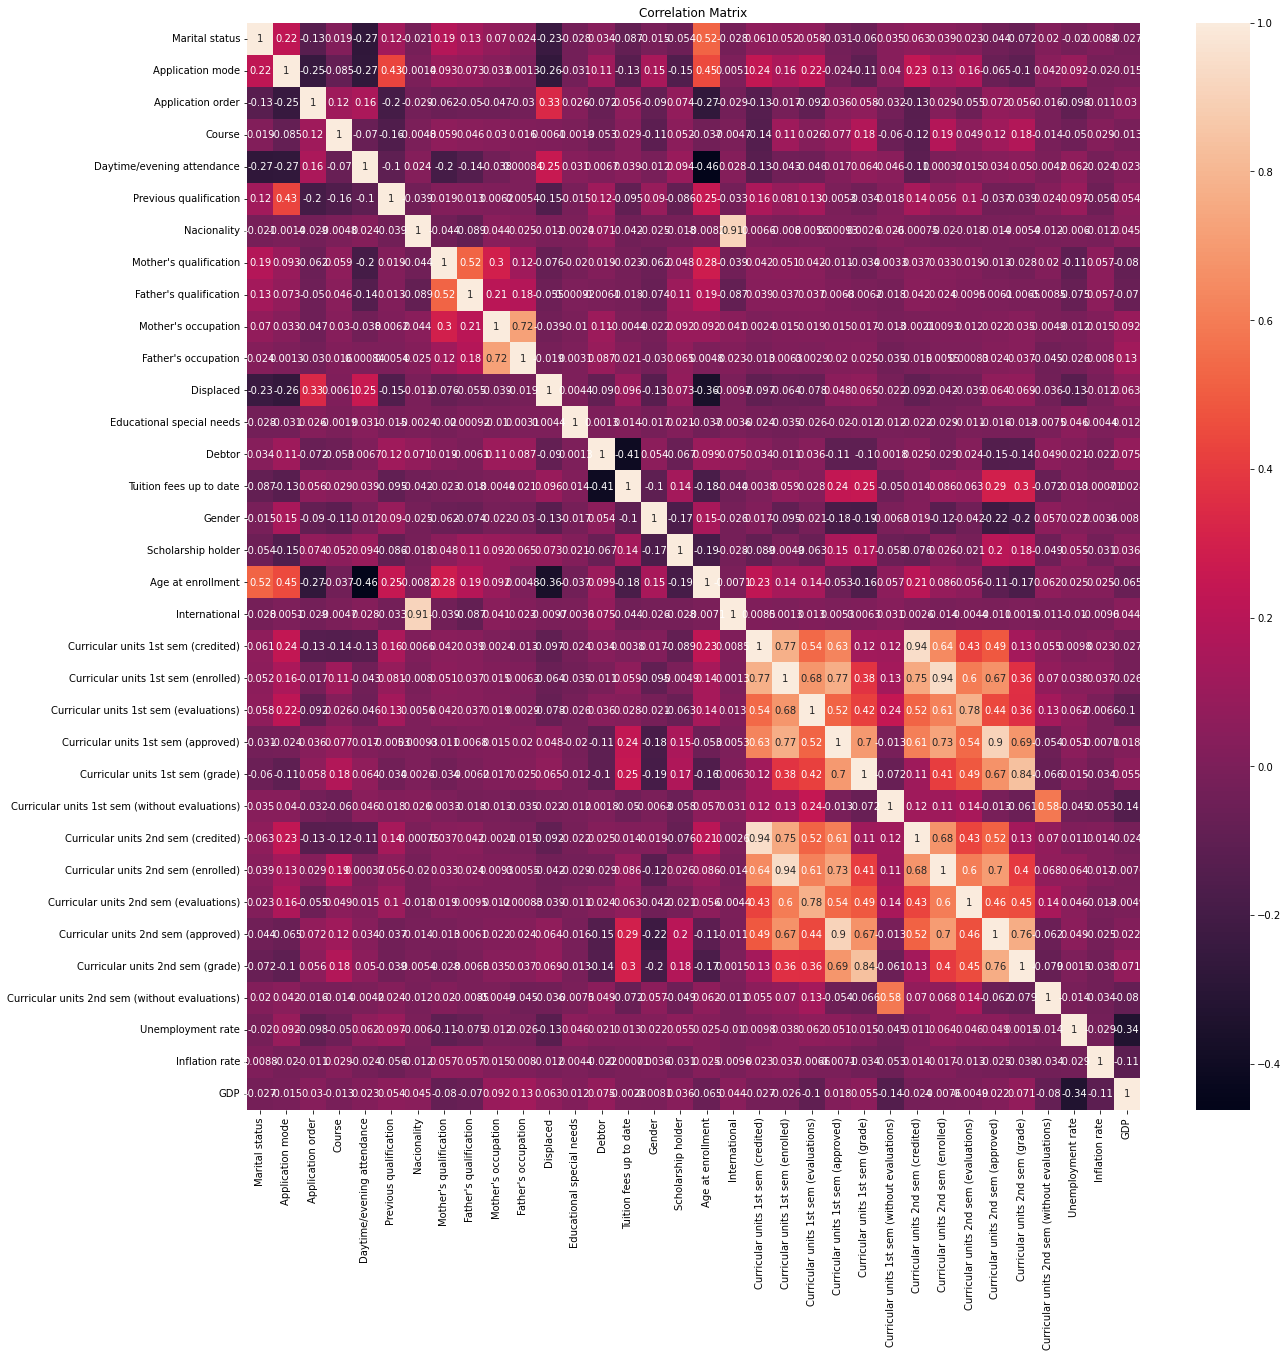

In [ ]:
# Create a correlation matrix
corr_matrix = df.corr()

fig, ax = plt.subplots(figsize=(20, 20))
# Create a heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

Preparing the Data for Model

In [ ]:
# Create a copy to leave de original dataset unchanged
students_df=df.copy() 

# Change the Target to Numerical Value 0 or 1. We are predicting if a Student is gonna Dropout or Graduate, ignoring the ones who are Enrolled.
students_df.replace("Dropout",1,inplace=True) 
students_df.replace("Graduate",0,inplace=True)
students_df.drop(students_df[students_df["Target"]=="Enrolled"].index,inplace=True)
students_df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,1
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,0
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,1
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,0
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,15,1,1,1,1,1,6,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,0
4420,1,1,2,15,1,1,19,1,1,10,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,1
4421,1,1,1,12,1,1,1,22,27,10,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,1
4422,1,1,1,9,1,1,1,22,27,8,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,0



Obtaining the Variables

In [ ]:
y=students_df["Target"]
y=y.astype('int')
y

0       1
1       0
2       1
3       0
4       0
       ..
4419    0
4420    1
4421    1
4422    0
4423    0
Name: Target, Length: 3630, dtype: int64

In [ ]:
X=students_df.iloc[:,:-1]
X


,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0,0.000000,0,10.8,1.4,1.74
1,1,6,1,11,1,1,1,1,3,4,...,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79
2,1,1,5,5,1,1,1,22,27,10,...,0,0,6,0,0,0.000000,0,10.8,1.4,1.74
3,1,8,2,15,1,1,1,23,27,6,...,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12
4,2,12,1,3,0,1,1,22,28,10,...,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,15,1,1,1,1,1,6,...,0,0,6,8,5,12.666667,0,15.5,2.8,-4.06
4420,1,1,2,15,1,1,19,1,1,10,...,0,0,6,6,2,11.000000,0,11.1,0.6,2.02
4421,1,1,1,12,1,1,1,22,27,10,...,0,0,8,9,1,13.500000,0,13.9,-0.3,0.79
4422,1,1,1,9,1,1,1,22,27,8,...,0,0,5,6,5,12.000000,0,9.4,-0.8,-3.12


In [ ]:
# spliting the data into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


Training the Model with Logistic Regression

In [ ]:

import warnings
from sklearn.exceptions import ConvergenceWarning

# create the model
log_reg = LogisticRegression()

# fit the model on the training data
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=ConvergenceWarning)
    log_reg.fit(X=X_train, y=y_train)

# make predictions on the testing data
lr_y_pred = log_reg.predict(X_test)

# calculate cross-entropy loss
cel = log_loss(y_test, lr_y_pred)

print("Cross-Entropy Loss:", cel)

Cross-Entropy Loss: 2.9291674241844516


In [ ]:
# Create a classification report
cr =classification_report(y_test, lr_y_pred)
print(cr)

cm = confusion_matrix(y_test, lr_y_pred)
print(cm)


              precision    recall  f1-score   support

           0       0.91      0.96      0.94       448
           1       0.93      0.86      0.89       278

    accuracy                           0.92       726
   macro avg       0.92      0.91      0.91       726
weighted avg       0.92      0.92      0.92       726

[[429  19]
 [ 40 238]]


[[429  19]
 [ 40 238]]


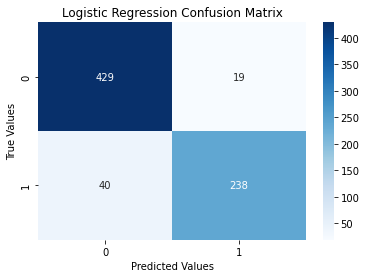

In [ ]:
# Create a confusion matrix
cm = confusion_matrix(y_test, lr_y_pred)
print(cm)
plt.title('Logistic Regression Confusion Matrix')
sns.heatmap(cm, annot=True,cmap='Blues', fmt='g')
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.show()

Model Accuracy

In [ ]:
print("Accuracy Score: ",accuracy_score(y_test,lr_y_pred))
print("Precision Score: ", precision_score(y_test, lr_y_pred))
print("Recall Score: ", recall_score(y_test, lr_y_pred))
print("F1 score: ",f1_score(y_test, lr_y_pred))

Accuracy Score:  0.918732782369146
Precision Score:  0.9260700389105059
Recall Score:  0.8561151079136691
F1 score:  0.8897196261682243


In [ ]:
coefficients = log_reg.coef_
print('Coefficients:', coefficients)

Coefficients: [[-0.29739589  0.03345266  0.02776342  0.10904223  0.33503446 -0.01968545
  -0.01271343  0.01179671 -0.00967376 -0.05257543  0.00355066  0.28739731
   0.03517585  1.30528461 -2.18758254  0.39216159 -0.81378516  0.03616569
  -0.15120675  0.1961673   0.29754516  0.00401812 -0.65904494  0.11344378
  -0.09691692  0.20032147  0.6431108   0.03029319 -0.94863375 -0.10630822
  -0.25686926  0.07626156 -0.01008387  0.00874268]]


Training the Model with Decision Tree classifier


              precision    recall  f1-score   support

           0       0.88      0.88      0.88       448
           1       0.80      0.80      0.80       278

    accuracy                           0.85       726
   macro avg       0.84      0.84      0.84       726
weighted avg       0.85      0.85      0.85       726



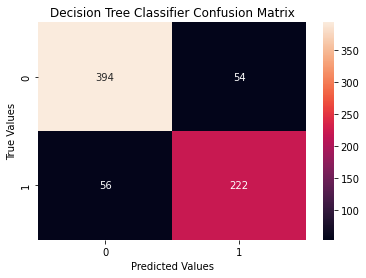

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_y_pred = dt.predict(X_test)


print(classification_report(y_test, dt_y_pred))
plt.title('Decision Tree Classifier Confusion Matrix')
sns.heatmap(confusion_matrix(y_test, dt_y_pred), annot=True, fmt='g')
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.show()



Training the Model with Random Forest Classifier

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       448
           1       0.94      0.84      0.89       278

    accuracy                           0.92       726
   macro avg       0.92      0.90      0.91       726
weighted avg       0.92      0.92      0.92       726



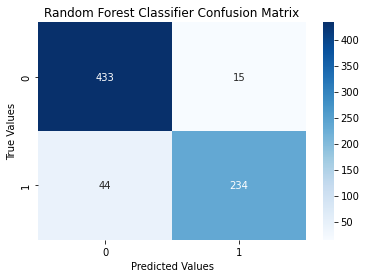

In [ ]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
rf_y_pred = rf.predict(X_test)


print(classification_report(y_test, rf_y_pred))
plt.title('Random Forest Classifier Confusion Matrix')
sns.heatmap(confusion_matrix(y_test, rf_y_pred), annot=True,fmt='g', cmap='Blues')
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.show()



Training the Model with XGBoost

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(data, y_xg, train_size=0.8, test_size=0.2,random_state=0)

#Checking that all the columns have numerical values (we must find a length of 34 which : all columns - target)
numerical_cols = [cname for cname in X_train.columns if X_train[cname].dtype in ['int64','float64']]
len(numerical_cols)


34

In [ ]:
model = XGBRegressor(n_estimators=400, learning_rate=0.1, n_jobs=4)

y_train = y_train.values.reshape(-1, 1)
ordinal_encoder = OrdinalEncoder()
y_train = ordinal_encoder.fit_transform(y_train)

#Fitting
model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=400, n_jobs=4, num_parallel_tree=None, predictor=None,
             random_state=None, ...)

Testing the accuracy with xgboost


In [ ]:
#Same goes for the y_valid values
y_valid = y_valid.values.reshape(-1, 1)
y_valid = ordinal_encoder.transform(y_valid)
y_pred = model.predict(X_valid)

mae = mean_absolute_error(y_valid, y_pred)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 0.37460530340289405


In [ ]:
print('Logistic Regression Accuracy:', accuracy_score(y_test, lr_y_pred))
print('Decision Tree Classifier Accuracy:', accuracy_score(y_test, dt_y_pred))
print('Random Forest Classifier Accuracy:', accuracy_score(y_test, rf_y_pred))


Logistic Regression Accuracy: 0.918732782369146
Decision Tree Classifier Accuracy: 0.8484848484848485
Random Forest Classifier Accuracy: 0.918732782369146


In [ ]:
lr_accuracy = accuracy_score(y_test, lr_y_pred)
dt_accuracy = accuracy_score(y_test, dt_y_pred)
rf_accuracy = accuracy_score(y_test, rf_y_pred)


# Print the accuracy of each model
print('Logistic Regression Accuracy:', lr_accuracy)
print('Decision Tree Classifier Accuracy:', dt_accuracy)
print('Random Forest Classifier Accuracy:', rf_accuracy)


# Identify the best performing model
best_model = max(lr_accuracy, dt_accuracy, rf_accuracy)

if best_model == lr_accuracy:
    print('The Logistic Regression model had the best accuracy at predicting dropout rates.')
elif best_model == dt_accuracy:
    print('The Decision Tree Classifier model had the best accuracy at predicting dropout rates.')
elif best_model == rf_accuracy:
    print('The Random Forest Classifier model had the best accuracy at predicting dropout rates.')
else:
    print('no')

Logistic Regression Accuracy: 0.918732782369146
Decision Tree Classifier Accuracy: 0.8484848484848485
Random Forest Classifier Accuracy: 0.918732782369146
The Logistic Regression model had the best accuracy at predicting dropout rates.
